# LEVEL 2 and LEVEL 3

# Name : Rina Gohil

**Dataset : Restaurant Dataset**

**Level 2 Tasks:**

**Task 1: Table Booking and Online Delivery**
    
- Determine the percentage of restaurants thatoffer table booking and online delivery.
- Compare the average ratings of restaurant swith table booking and those without.
- Analyze the availability of online delivery among restaurants with different price ranges.

**Import Necessary Libraries**

In [1]:
# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("Dataset .csv")

**Percentage of Table Booking and Online Delivery**

In [4]:
# Percentage of restaurants offering table booking and online delivery
total_restaurants = len(df)

table_booking_percentage = (df['Has Table booking'] == 'Yes').sum() / total_restaurants * 100
online_delivery_percentage = (df['Has Online delivery'] == 'Yes').sum() / total_restaurants * 100

print(f"Percentage of restaurants offering Table Booking: {table_booking_percentage:.2f}%")
print(f"Percentage of restaurants offering Online Delivery: {online_delivery_percentage:.2f}%")

Percentage of restaurants offering Table Booking: 12.12%
Percentage of restaurants offering Online Delivery: 25.66%


**Restaurants with and without Tablr Booking**

In [5]:
# Compare average ratings of restaurants with and without table booking
avg_rating_with_table = df[df['Has Table booking'] == 'Yes']['Aggregate rating'].mean()
avg_rating_without_table = df[df['Has Table booking'] == 'No']['Aggregate rating'].mean()
print(f"Average rating with Table Booking: {avg_rating_with_table:.2f}")
print(f"Average rating without Table Booking: {avg_rating_without_table:.2f}")

Average rating with Table Booking: 3.44
Average rating without Table Booking: 2.56


**Availability of Online Delivery**

In [6]:
# Availability of online delivery among restaurants with different price ranges
price_ranges = df['Average Cost for two'].apply(lambda x: 'Low' if x < 500 else 'Medium' if 500 <= x <= 1000 else 'High')
online_delivery_by_price_range = df.groupby(price_ranges)['Has Online delivery'].value_counts(normalize=True).unstack()
print("Online Delivery Availability by Price Range:")
print(online_delivery_by_price_range)

Online Delivery Availability by Price Range:
Has Online delivery         No       Yes
Average Cost for two                    
High                  0.719149  0.280851
Low                   0.858523  0.141477
Medium                0.566209  0.433791


**Task 2: Price Range Analysis**
    
- Determine the most common price range among all the restaurants.
- Calculate the average rating for each price range.
- Identify the color that represents the highest average rating among different price ranges.

**Determine the most common price range among all the restaurants.**

In [7]:
# Determining the most common price range among all the restaurants
most_common_price_range = df['Price range'].mode()[0]
print(f"Most Common Price Range: {most_common_price_range}")

Most Common Price Range: 1


**Calculate the average rating for each price range.**

In [8]:
# Calculating average rating for each price range
avg_rating_by_price_range = df.groupby('Price range')['Aggregate rating'].mean()
print("Average rating for each price range:")
print(round(avg_rating_by_price_range,3))

Average rating for each price range:
Price range
1    2.000
2    2.941
3    3.683
4    3.818
Name: Aggregate rating, dtype: float64


**Identify the color that represents the highest average rating among different price ranges.**

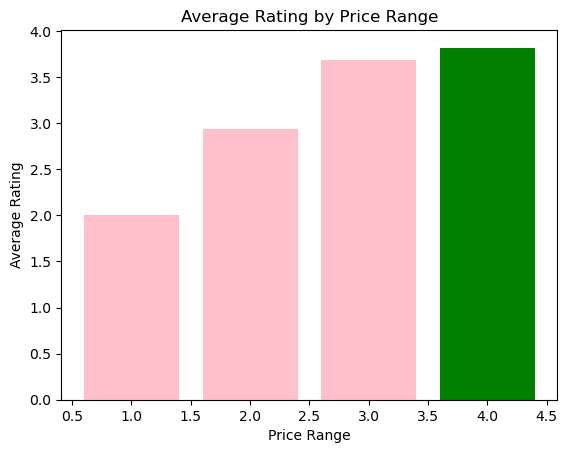

In [9]:
# Identifying the color that represents the highest average rating among different price ranges
highest_avg_rating_color = avg_rating_by_price_range.idxmax()

plt.bar(avg_rating_by_price_range.index, avg_rating_by_price_range, color='pink')

# Set the color of the bar corresponding to the highest average rating to a distinct color
plt.bar(highest_avg_rating_color, avg_rating_by_price_range[highest_avg_rating_color], color='green')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.title('Average Rating by Price Range')
plt.show()


**Task 3: Feature Engineering**

- Extract additional features from the existingcolumns, such as the length of the restaurantname or address.
- Create new features like "Has Table Booking"or "Has Online Delivery" by encodingcategorical variables.

**Extract additional features from the existingcolumns, such as the length of the restaurantname or address.**

In [10]:
# Extracting additional features from the existing columns, such as the length of the restaurant name or address
df['Restaurant Name Length'] = df['Restaurant Name'].apply(len)
df['Address Length'] = df['Address'].apply(len)
df.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Restaurant Name Length,Address Length
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,16,71


**Create new features like "Has Table Booking"or "Has Online Delivery" by encodingcategorical variables.**

In [14]:
# Creating new features like "Has Table Booking" or "Has Online Delivery" by encoding categorical variables
df['Has Table Booking'] = np.where(df['Has Table booking'] == 'Yes', 1, 0)
df['Has Online Delivery'] = np.where(df['Has Online delivery'] == 'Yes', 1, 0)

# Drop the original categorical columns if needed
# df = df.drop(['Has Table booking', 'Has Online delivery'], axis=1)

df.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Restaurant Name Length,Address Length,Has Table Booking,Has Online Delivery
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,3,4.8,Dark Green,Excellent,314,16,71,1,0


# LEVEL 3

**Level 3 Tasks:**

**Task 1: Predictive Modeling**

- Build a regression model to predict theaggregate rating of a restaurant based on available features.
- Split the dataset into training and testing setsand evaluate the model's performance using appropriate metrics.
- Experiment with different algorithms (e.g.,linear regression, decision trees, randomforest) and compare their performance.

**Build a regression model to predict theaggregate rating of a restaurant based onavailable features.**

In [16]:
# Creating a regression model to predict the aggregate rating of a restaurant based on available features
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
# Convert categorical variables to numeric using one-hot encoding
df = pd.get_dummies(df, columns=['Has Table booking', 'Has Online delivery'], drop_first=True)

In [20]:
features = ['Average Cost for two', 'Votes', 'Price range', 'Has Table booking_Yes', 'Has Online delivery_Yes']
target = 'Aggregate rating'

X = df[features]
y = df[target]

**Split the Dataset into Training and Testing Sets**

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Experiment with different algorithms (e.g.,linear regression, decision trees, randomforest) and compare their performance**

In [22]:
# Experimenting with different algorithms (e.g., linear regression, decision trees, random forest)

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("---------------------------")


Model: Linear Regression
Mean Squared Error: 1.6764802747031446
R-squared: 0.26344464090219477
---------------------------
Model: Decision Tree
Mean Squared Error: 0.20894559762881168
R-squared: 0.9082005305904085
---------------------------
Model: Random Forest
Mean Squared Error: 0.13459361641080625
R-squared: 0.9408667963687866
---------------------------


**Build a regression model to predict theaggregate rating of a restaurant based onavailable features.**

**Task 2 : Customer Preference Analysis**

- Analyze the relationship between the type of cuisine and the restaurant's rating.
- Identify the most popular cuisines amongcustomers based on the number of votes.
- Determine if there are any specific cuisinesthat tend to receive higher ratings.

**Analyze the relationship between the type of cuisine and the restaurant's rating.**

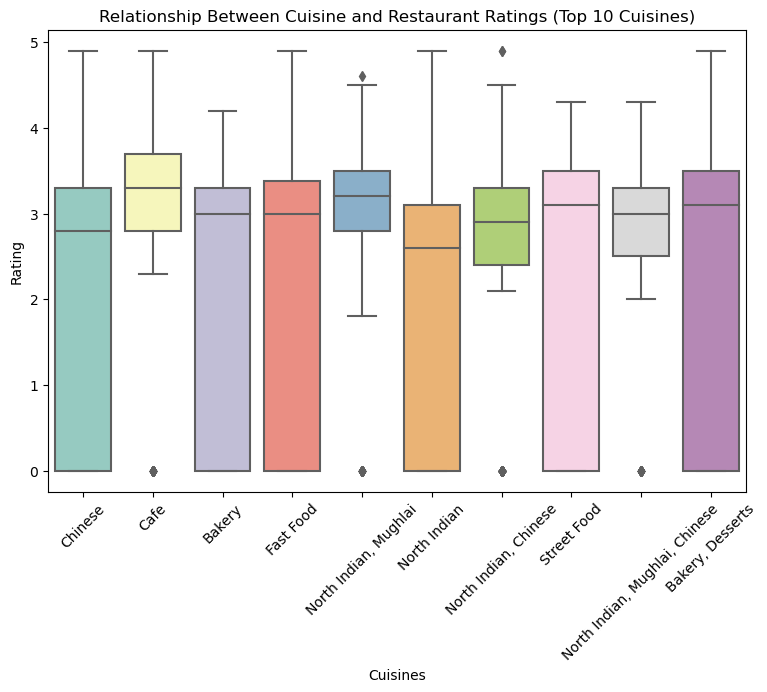

In [23]:
# Analyze the relationship between the type of cuisine and the restaurant's rating
top_n = 10  
top_cuisines = df['Cuisines'].value_counts().head(top_n).index
df_filtered = df[df['Cuisines'].isin(top_cuisines)]

custom_palette = sns.color_palette("Set3")

plt.figure(figsize=(9, 6))
sns.boxplot(data=df_filtered, x='Cuisines', y='Aggregate rating', palette=custom_palette)

plt.title(f'Relationship Between Cuisine and Restaurant Ratings (Top {top_n} Cuisines)')
plt.xlabel('Cuisines')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()


**Most Popular Cuisines by Number of Votes**

In [24]:
# Identifying most popular cuisines based on number of votes
top_cuisines = df.groupby('Cuisines')['Votes'].sum().nlargest(10)
print("Top Cuisines by Number of Votes:")
print(top_cuisines)

Top Cuisines by Number of Votes:
Cuisines
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian                      16433
Mughlai, North Indian             15275
Italian                           14799
Name: Votes, dtype: int64


**Cusines with Higher Ratings**

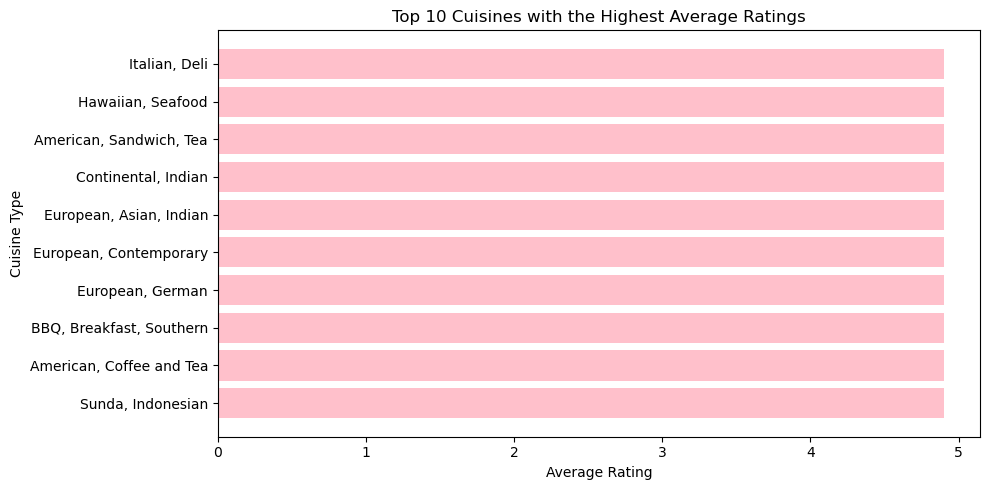

In [25]:
# Calculate the average rating for each cuisine
cuisine_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().reset_index()

# Sort cuisines by their average rating in descending order
cuisine_ratings = cuisine_ratings.sort_values(by='Aggregate rating', ascending=False)
bar_color = 'pink'

plt.figure(figsize=(10, 5))
plt.barh(cuisine_ratings['Cuisines'][:10], cuisine_ratings['Aggregate rating'][:10], color=bar_color)
plt.xlabel('Average Rating')
plt.ylabel('Cuisine Type')
plt.title('Top 10 Cuisines with the Highest Average Ratings')
plt.gca().invert_yaxis()  # To display the highest rating at the top
plt.tight_layout()
plt.show()


**Task 3: Data Visualization**

- Create visualizations to represent the distribution of ratings using different charts (histogram, barplot, etc.).
- Compare the average ratings of different cuisinesor cities using appropriate visualizations.
- Visualize the relationship between various features and the target variable to gain insights.

**distributionof ratings using different charts**

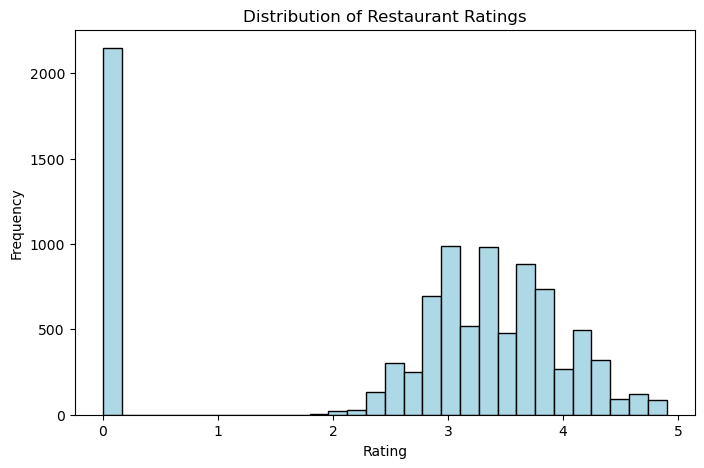

In [26]:
hist_color = 'lightblue'

# Distribution of ratings by using a histogram
plt.figure(figsize=(8, 5))
plt.hist(df['Aggregate rating'], bins=30, color=hist_color, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Restaurant Ratings')
plt.show()


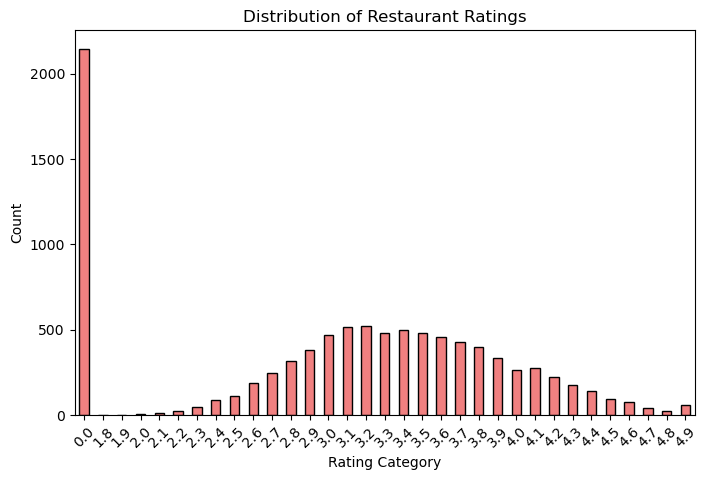

In [27]:
# Calculate the count of each rating category
rating_counts = df['Aggregate rating'].value_counts().sort_index()

# Choose your desired color
bar_color = 'lightcoral'

# Distribution of ratings by using a bar plot
plt.figure(figsize=(8, 5))
rating_counts.plot(kind='bar', color=bar_color, edgecolor='black')

# Add labels and title
plt.xlabel('Rating Category')
plt.ylabel('Count')
plt.title('Distribution of Restaurant Ratings')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display Chart
plt.show()


**Comparing Average Ratings for Different Cuisines**

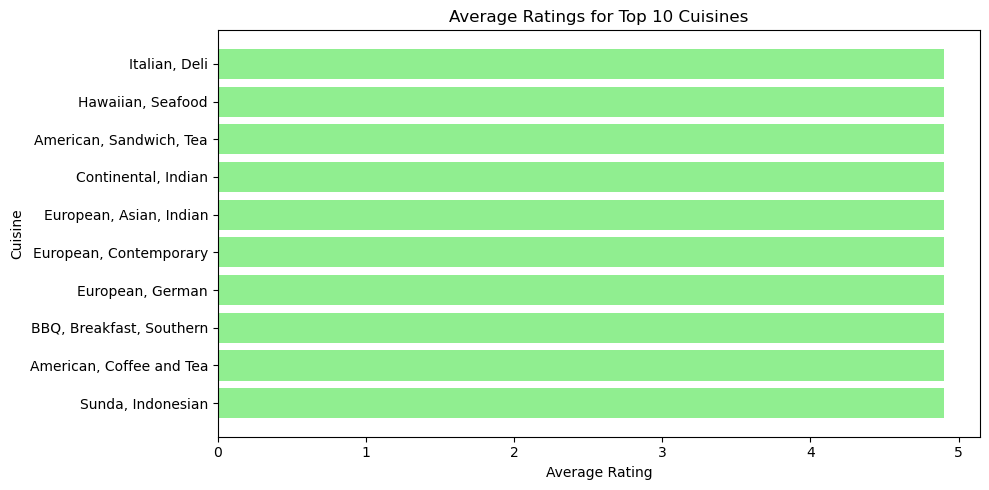

In [28]:
# Choose your desired color
bar_color = 'lightgreen'

# Count Plot Visualization Code for the cuisines with the highest ratings
plt.figure(figsize=(10, 5))
plt.barh(cuisine_ratings['Cuisines'][:10], cuisine_ratings['Aggregate rating'][:10], color=bar_color)

# Add labels and title
plt.ylabel('Cuisine')
plt.xlabel('Average Rating')
plt.title('Average Ratings for Top 10 Cuisines')
plt.gca().invert_yaxis()  # To display the highest rating at the top
plt.tight_layout()

# Display Chart
plt.show()


**Comparing Average Ratings for Different Cities**

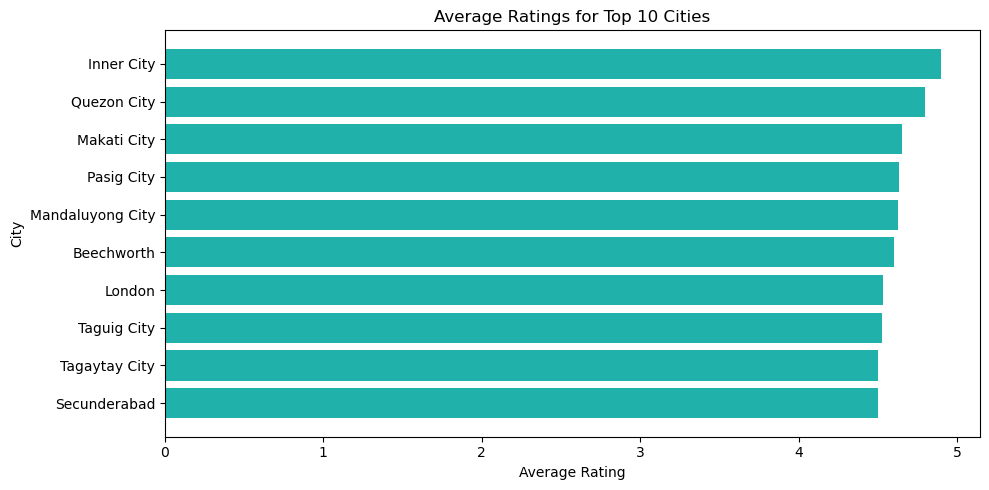

In [29]:
# Calculate the average rating for each city
city_ratings = df.groupby('City')['Aggregate rating'].mean().reset_index()

# Sort cities by their average rating in descending order
city_ratings = city_ratings.sort_values(by='Aggregate rating', ascending=False)

# Choose your desired color
bar_color = 'lightseagreen'

# Bar Plot Visualization for cities with the highest ratings
plt.figure(figsize=(10, 5))
plt.barh(city_ratings['City'][:10], city_ratings['Aggregate rating'][:10], color=bar_color)

# Add labels and title
plt.ylabel('City')
plt.xlabel('Average Rating')
plt.title('Average Ratings for Top 10 Cities')
plt.gca().invert_yaxis()  # To display the highest rating at the top
plt.tight_layout()

# Display the chart
plt.show()


**Relationship Between Various Features and the Target Variable**

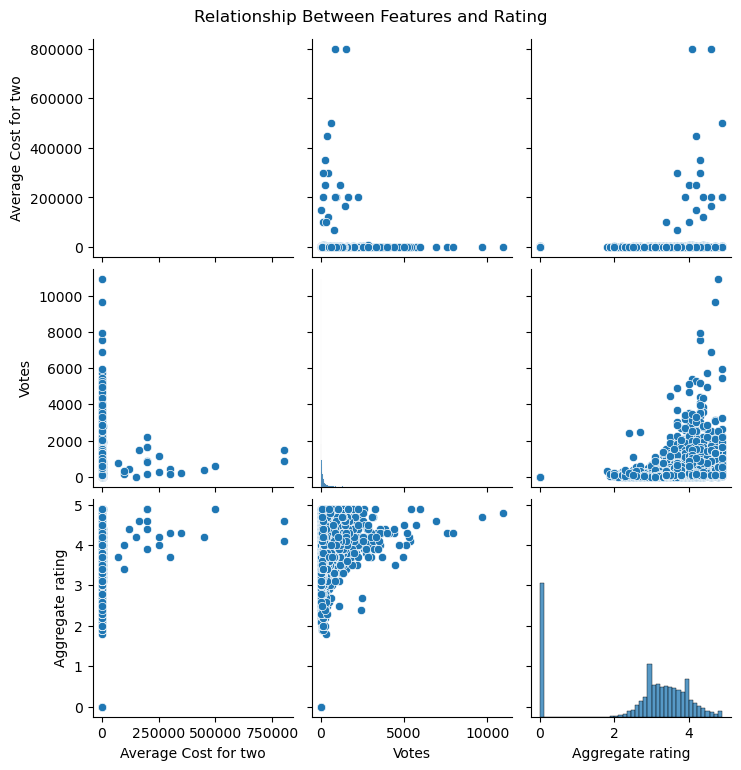

In [31]:
# Visualizing the relationship between various features and the target variable by using pair plot
sns.pairplot(data=df, vars=['Average Cost for two', 'Votes', 'Aggregate rating'], palette='magenta')
plt.suptitle("Relationship Between Features and Rating", y=1.02)

# Display Chart
plt.show()
